In [3]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.io import fits
from astropy.table import Table

from nrm_analysis.misctools import mask_definitions


(-5.029882, 5.134118, -5.082, 5.082)

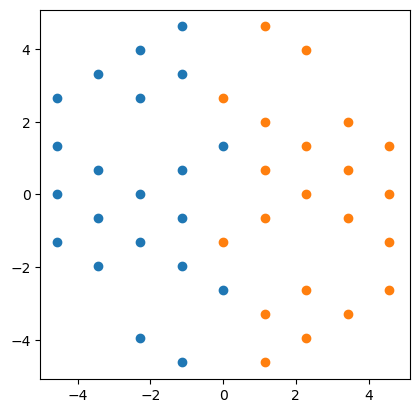

In [5]:

f2f,mask = mask_definitions.jwst_g7s6c()

thisu = np.subtract.outer(mask[:,0],mask[:,0])
thisu = thisu.T[np.where(~np.eye(thisu.shape[0],dtype=bool))]

thisv = np.subtract.outer(mask[:,1],mask[:,1])
thisv = thisv.T[np.where(~np.eye(thisv.shape[0],dtype=bool))]

bls = np.array([thisv,thisu]).T
u, v = bls[:,0], bls[:,1]
args = np.argsort(u)[:21]
u, v = u[args], v[args]
w = np.sqrt(u**2 + v**2)

plt.scatter(u,v)
plt.scatter(-u,-v)
plt.axis('square')

In [6]:
vis_430M = Table.read('../data/Visib_4.3um.dat',format='ascii')
vis_480M = Table.read('../data/Visib_4.8um.dat',format='ascii')

vis_340M = Table.read('../data/Visib_3.40um.dat',format='ascii')
vis_361M = Table.read('../data/Visib_3.61um.dat',format='ascii')

vis_430M.rename_column('col1','Baseline')
vis_430M.rename_column('col2','Full Visibility')
vis_430M.rename_column('col3','Star Visibility')

vis_480M.rename_column('col1','Baseline')
vis_480M.rename_column('col2','Full Visibility')
vis_480M.rename_column('col3','Star Visibility')

vis_340M.rename_column('col1','Baseline')
vis_340M.rename_column('col2','Full Visibility')
vis_340M.rename_column('col3','Star Visibility')

vis_361M.rename_column('col1','Baseline')
vis_361M.rename_column('col2','Full Visibility')
vis_361M.rename_column('col3','Star Visibility')


In [7]:
vis_430Mb = Table.read('../Visib_4.3um.dat',format='ascii')
vis_480Mb = Table.read('../Visib_4.8um.dat',format='ascii')


vis_430Mb.rename_column('col1','Baseline')
vis_430Mb.rename_column('col2','Full Visibility')
vis_430Mb.rename_column('col3','Star Visibility')

vis_480Mb.rename_column('col1','Baseline')
vis_480Mb.rename_column('col2','Full Visibility')
vis_480Mb.rename_column('col3','Star Visibility')

In [17]:
poly430Mb = np.poly1d(np.polyfit(vis_430Mb['Baseline'][:15],vis_430Mb['Full Visibility'][:15],4))
poly480Mb = np.poly1d(np.polyfit(vis_480Mb['Baseline'][:15],vis_480Mb['Full Visibility'][:15],4))
jwst_baselines = np.linspace(0,10,1000)

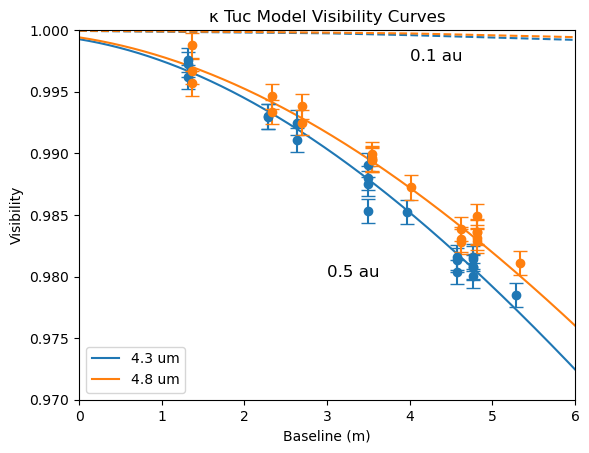

In [35]:
plt.plot(vis_430M['Baseline'],vis_430M['Full Visibility'],linestyle='--',color='C0')
plt.plot(vis_480M['Baseline'],vis_480M['Full Visibility'],linestyle='--',color='C1')

# plt.plot(vis_430Mb['Baseline'],vis_430Mb['Full Visibility'],label='4.3 um',color='C0')
# plt.plot(vis_480Mb['Baseline'],vis_480Mb['Full Visibility'],label='4.8 um',color='C1')

plt.plot(jwst_baselines,poly430Mb(jwst_baselines),color='C0',linestyle='-',label='4.3 um')
plt.plot(jwst_baselines,poly480Mb(jwst_baselines),color='C1',linestyle='-',label='4.8 um')
# plt.plot(vis_340M['Baseline'],vis_340M['Full Visibility'],label='3.4 um',color='C2')
# plt.plot(vis_361M['Baseline'],vis_361M['Full Visibility'],label='3.61 um',color='C3')

precision = 1e-3

# plt.errorbar(vis_430M['Baseline'],vis_430M['Full Visibility'],yerr=np.ones_like(vis_430M['Star Visibility'])*precision,
#              fmt='o',color='C0',capsize=5,label=f'{precision*100}% Error')
# plt.errorbar(vis_480M['Baseline']+0.05,vis_480M['Full Visibility'],yerr=np.ones_like(vis_480M['Star Visibility'])*precision,
#             fmt='o',color='C1',capsize=5,label=f'{precision*100}% Error')
plt.errorbar(w,poly430Mb(w)+precision*np.random.randn(len(w)),yerr=np.ones_like(w)*precision,
             fmt='o',color='C0',capsize=5)
plt.errorbar(w+0.05,poly480Mb(w)+precision*np.random.randn(len(w)),yerr=np.ones_like(w)*precision,
            fmt='o',color='C1',capsize=5)

# plt.errorbar(vis_340M['Baseline']+0.1,vis_340M['Full Visibility'],yerr=np.ones_like(vis_340M['Star Visibility'])*precision,
#             fmt='o',color='C2',capsize=5,label=f'{precision*100}% Error')
# plt.errorbar(vis_361M['Baseline']+0.15,vis_361M['Full Visibility'],yerr=np.ones_like(vis_361M['Star Visibility'])*precision,
#             fmt='o',color='C3',capsize=5,label=f'{precision*100}% Error')

plt.xlabel('Baseline (m)')
plt.ylabel('Visibility')
plt.legend(loc='lower left')
# plt.semilogx()
# plt.axvline(5.280,color='k',linestyle='--',label='JWST Longest Baseline')
plt.text(4,0.9975,'0.1 au',fontsize=12)
plt.text(3,0.98,'0.5 au',fontsize=12)

plt.xlim(0,6)
plt.ylim(0.97,1.0)
plt.title('κ Tuc Model Visibility Curves')
plt.savefig('florian_visibilities.png',bbox_inches='tight')